```python
#!/usr/bin/env python3
import os
from base64 import b64decode
from hashlib import md5, sha3_256
from zlib import crc32


def magic_hash(x):
    h = md5(x).digest()
    h += crc32(h + x).to_bytes(4, "little")
    return sha3_256(h).digest()


def input_bytes(prompt):
    return b64decode(input(prompt).strip(), validate=True)


if __name__ == "__main__":
    flag = os.environ.get("FLAG", "flag{test}")
    m1 = input_bytes("m1: ")
    m2 = input_bytes("m2: ")
    if max(len(m1), len(m2)) <= 4321 and m1 != m2 and magic_hash(m1) == magic_hash(m2):
        print(flag)
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from base64 import b64decode
from hashlib import md5, sha3_256
import zlib
from zlib import crc32

def magic_hash(x):
    h = md5(x).digest()
    h += crc32(h + x).to_bytes(4, "little")
    return sha3_256(h).digest()

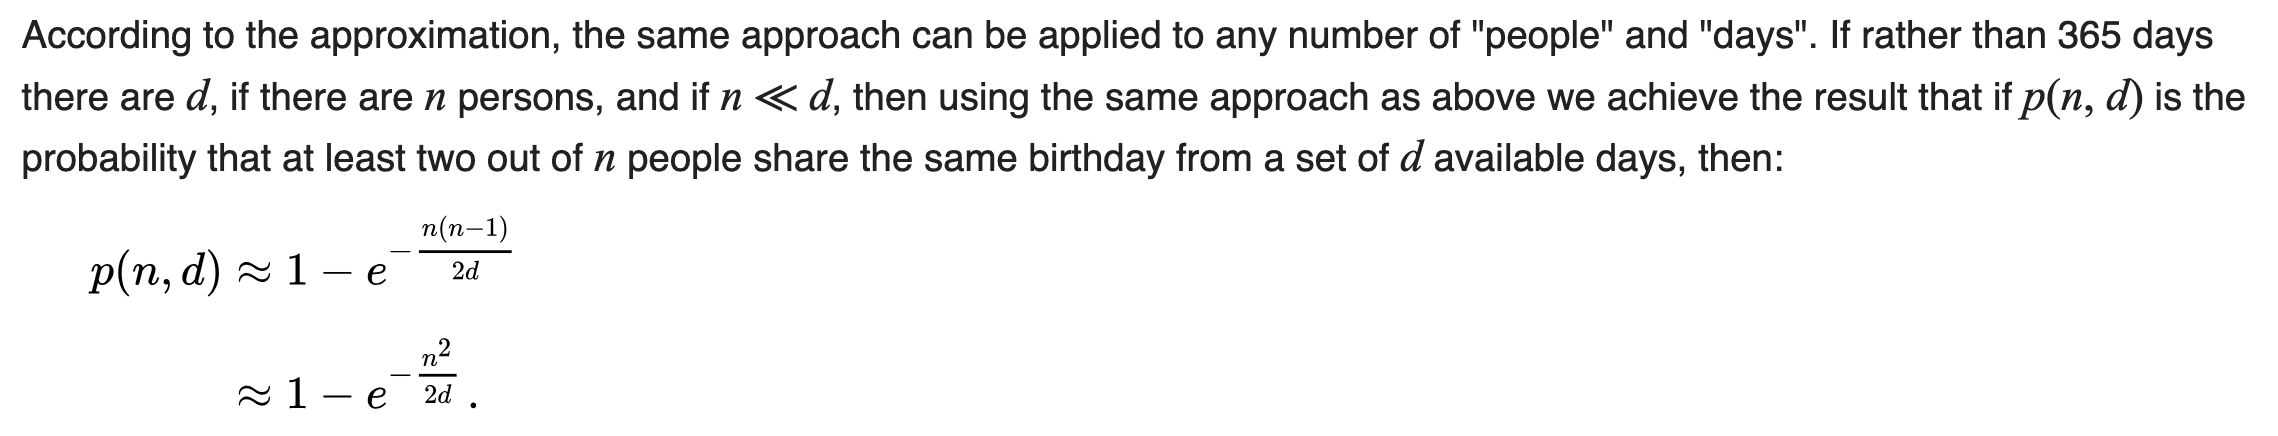

In [370]:
n = np.arange(1,len(all_inputs))
d = 2**32
y = 1 - np.exp(- (n**2) / (2*d))

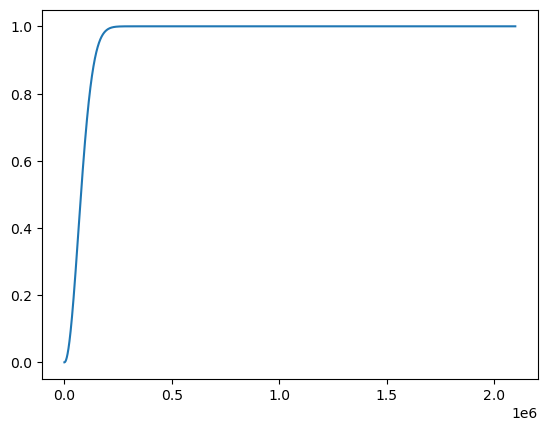

In [371]:
plt.plot(n,y)

```

```python
    h = md5(x).digest()
    h += crc32(h + x).to_bytes(4, "little")
```

$h(x) = md5(x) || crc(md5(x) + x)$

$h(x') == h(x) \iff md5(x) == md5(x') \land crc(md5(x) + x) == crc(md5('x) + 'x) \iff md5(x) == md5(x') \land crc(h + x) == crc(h + 'x)$

1. Generate md5 collision
    - <https://homepages.cwi.nl/~stevens/papers/eprint2006-104%20-%20Fast%20Collision%20Attack%20on%20MD5.pdf> => 67 seconds
2. Compute CRC combo
    - but the chance is actually not birthday paradox ...

$p = 2^{-32}$, so only at $2^16$ we are at roughly $\%50$

In [1]:
2**16

65536

In [ ]:
%%bash
# Function to generate unique input and output files
generate_files() {
    index="$1"
    temp_dir=$(mktemp -d --suffix=output)
    output1="$temp_dir/1-$index.out"
    output2="$temp_dir/2-$index.out"
    trap 'rm -f "$output1" "$output2"' EXIT
    echo "$output1 and $output2" >> log
    tmpfile=$(mktemp --suffix=prefix)
    while true; do
        head -c 4096 < /dev/urandom > "$tmpfile"
        /home/kali/Developer/md5collgen/md5collgen -q "$tmpfile" -o "$output1" "$output2" 1>/dev/null
        python3 magic_hash.py "$output1" "$output2" >> log
    done
}

echo "" > log

for i in {1..6}; do
    generate_files $i &
done

wait

Process is interrupted.


Another idea, because md5 collisions are expensive...

## Given :

$h(x) = md5(x) || crc(md5(x) || x)$

$h(x') == h(x) \iff md5(x) == md5(x') \land crc(md5(x) + x) == crc(md5('x) + 'x) \iff md5(x) == md5(x') \land crc(h + x) == crc(h + 'x)$

$crc(h || x) == crc(h || 'x) \iff crc(x,init=h) == crc('x,init=h)$ 

## Shortcut

- compute $x$ and $x'$ such that $h = md5(x) = md5(x')$
- because it is MD construct, we can do $md5(x + y) = md5(x' + y)$
- Therefore, we just do length extension all the time because it is way cheaper

## Plan

1. Generate one collision
2. Verify that length extension is working with the CRC
3. Randomly generate inputs until the CRC, given two different ones, collides

In [2]:
!pip install crcmod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for crcmod: filename=crcmod-1.7-cp312-cp312-macosx_11_0_arm64.whl size=22256 sha256=54aec534a37cfceb350a7e29f608d9283e914f445f26b30f01c35e7d27d50b0a
  Stored in directory: /Users/bluk/Library/Caches/pip/wheels/76/08/0b/caa8b1380122cbfe6a03eaccbec0f63c67e619af4e30ca5e2a
Successfully built crcmod


# Sample collision

Source: https://github.com/cr-marcstevens/hashclash
```
md5("TEXTCOLLBYfGiJUETHQ4hAcKSMd5zYpgqf1YRDhkmxHkhPWptrkoyz28wnI9V0aHeAuaKnak")
=
md5("TEXTCOLLBYfGiJUETHQ4hEcKSMd5zYpgqf1YRDhkmxHkhPWptrkoyz28wnI9V0aHeAuaKnak")
```

In [2]:
from assets import pymd5 
x1 = b"TEXTCOLLBYfGiJUETHQ4hAcKSMd5zYpgqf1YRDhkmxHkhPWptrkoyz28wnI9V0aHeAuaKnak"
x2 = b"TEXTCOLLBYfGiJUETHQ4hEcKSMd5zYpgqf1YRDhkmxHkhPWptrkoyz28wnI9V0aHeAuaKnak"

h1 = pymd5.md5()
h1.update(x1)
h2 = pymd5.md5()
h2.update(x2)

assert h1.digest() == h2.digest() and x1 != x2

Base on <https://github.com/cbornstein/python-length-extension/blob/master/len_ext.py>

```python
mlen = len(msg)+8 #assumes an 8 bit character password
bits = (mlen + len(padding(mlen*8)))*8
print("Message length in bits w/ secret key: ")
print(bits)

#establish new initialization vector and append command
h = md5(state=curhash.decode("hex"), count=bits)
x = "&command3=DeleteAllFiles" #sample appended command
h.update(x)

#generate new hash and url
newhash = h.hexdigest()
padding = urllib.quote(padding(mlen*8))
print("Padding found at end of original instructions: "+padding)
msg = msg + padding + x
```

In [3]:
mlen = len(x1)
bits = (mlen + len(pymd5.padding(mlen*8)))*8

y = b"Appended"

mlen,bits

(72, 1024)

Verify that the length extension is working

In [5]:
base1 = pymd5.md5(state=h1.digest(),count=bits)
base1.update(y)

collider = x1 + pymd5.padding(mlen*8) + y 
base2 = md5()
base2.update(collider)

assert base1.digest() == base2.digest()

In [8]:
collider1 = x1 + pymd5.padding(mlen*8) + y 
collider2 = x2 + pymd5.padding(mlen*8) + y 

base1 = pymd5.md5()
base2 = pymd5.md5()

base1.update(collider1)
base2.update(collider2)

assert base1.digest() == base2.digest()

In [9]:
crc32(collider1),crc32(collider2)

(3157332571, 1797238046)

In [13]:
crc32(collider1,0),crc32(collider2,0)

(3157332571, 1797238046)

# CRC collisions

1. set previous state 
2. add some random
3. hope for a collision

In [31]:
crc1 = crc32(x1 + pymd5.padding(mlen*8))
crc2 = crc32(x2 + pymd5.padding(mlen*8))

crc1,crc2

(79183605, 3350007900)

In [ ]:
from cryptography.utils import int_to_bytes
import base64

In [51]:
i = 3859762961
while True:
    payload = int_to_bytes(i)
    h = md5(x1 + pymd5.padding(mlen*8) + payload).digest()
    if crc32(h + x1 + pymd5.padding(mlen*8) + payload) == crc32(h + x2 + pymd5.padding(mlen*8) + payload):
        print(base64.b64encode(x1 + pymd5.padding(mlen*8) + payload))
        print(base64.b64encode(x2 + pymd5.padding(mlen*8) + payload))
        break 
    
    i+=1

KeyboardInterrupt: 

In [52]:
i

4374623172

In [70]:
4374623172/2**32

1.0185463288798928

# Another idea

In [68]:
def crc32_combine(crc1, crc2, len2):
    """Explanation algorithm: https://stackoverflow.com/a/23126768/654160
    crc32(crc32(0, seq1, len1), seq2, len2) == crc32_combine(
        crc32(0, seq1, len1), crc32(0, seq2, len2), len2)"""
    # degenerate case (also disallow negative lengths)
    if len2 <= 0:
        return crc1

    # put operator for one zero bit in odd
    # CRC-32 polynomial, 1, 2, 4, 8, ..., 1073741824
    odd = [0xedb88320] + [1 << i for i in range(0, 31)]
    even = [0] * 32

    def matrix_times(matrix, vector):
        number_sum = 0
        matrix_index = 0
        while vector != 0:
            if vector & 1:
                number_sum ^= matrix[matrix_index]
            vector = vector >> 1 & 0x7FFFFFFF
            matrix_index += 1
        return number_sum

    # put operator for two zero bits in even - gf2_matrix_square(even, odd)
    even[:] = [matrix_times(odd, odd[n]) for n in range(0, 32)]

    # put operator for four zero bits in odd
    odd[:] = [matrix_times(even, even[n]) for n in range(0, 32)]

    # apply len2 zeros to crc1 (first square will put the operator for one
    # zero byte, eight zero bits, in even)
    while len2 != 0:
        # apply zeros operator for this bit of len2
        even[:] = [matrix_times(odd, odd[n]) for n in range(0, 32)]
        if len2 & 1:
            crc1 = matrix_times(even, crc1)
        len2 >>= 1

        # if no more bits set, then done
        if len2 == 0:
            break

        # another iteration of the loop with odd and even swapped
        odd[:] = [matrix_times(even, even[n]) for n in range(0, 32)]
        if len2 & 1:
            crc1 = matrix_times(odd, crc1)
        len2 >>= 1

        # if no more bits set, then done
    # return combined crc
    crc1 ^= crc2
    return crc1

In [61]:
x = x1 + pymd5.padding(mlen*8) + int_to_bytes(1024)
h = md5(x).digest()

In [62]:
crc32(h + x)

2046403471

In [69]:
crc32_combine(crc32(h),crc32(x),len(x))

2046403471

In [72]:
crc32(x,crc32(h))

2046403471

# New idea: generate multiple collisions

so find $x_i$ with $h = md5(x_1) = \cdots = md5(x_n)$

In [ ]:
%%bash
temp_dir=$(mktemp -d -t "inputs-gen-3")
echo $temp_dir
for i in {1..16}; do
    head -c 56 /dev/zero | tr "\0" "A" > payload.md5 
    head -c  8 /dev/urandom >> payload.md5 
    /Users/bluk/Developer/md5collgen/md5collgen -i "088eafefdfb84da5cd72cbc415f49bbf" -o "$temp_dir/${i}-1" "$temp_dir/${i}-2" 
done
rm payload.md5

In [167]:
%%bash
temp_dir=$(mktemp -d -t "inputs-gen-3")
echo $temp_dir
/Users/bluk/Developer/md5collgen/md5collgen -i "088eafefdfb84da5cd72cbc415f49bbf" -o "$temp_dir/1-1" "$temp_dir/1-2" 
/Users/bluk/Developer/md5collgen/md5collgen -i "a25f57dc373c80244fd488d522dc848f" -o "$temp_dir/2-1" "$temp_dir/2-2" 

/var/folders/79/zj7smr4j2j324rn23rdq18n80000gn/T/inputs-gen-3.CaqQFeDkYh
MD5 collision generator v1.5
by Marc Stevens (http://www.win.tue.nl/hashclash/)

Using output filenames: '/var/folders/79/zj7smr4j2j324rn23rdq18n80000gn/T/inputs-gen-3.CaqQFeDkYh/1-1' and '/var/folders/79/zj7smr4j2j324rn23rdq18n80000gn/T/inputs-gen-3.CaqQFeDkYh/1-2'
Using initial value: 088eafefdfb84da5cd72cbc415f49bbf

Generating first block: ....
Generating second block: S11.................
Running time: 1.543684 s
MD5 collision generator v1.5
by Marc Stevens (http://www.win.tue.nl/hashclash/)

Using output filenames: '/var/folders/79/zj7smr4j2j324rn23rdq18n80000gn/T/inputs-gen-3.CaqQFeDkYh/2-1' and '/var/folders/79/zj7smr4j2j324rn23rdq18n80000gn/T/inputs-gen-3.CaqQFeDkYh/2-2'
Using initial value: a25f57dc373c80244fd488d522dc848f

Generating first block: ....................
Generating second block: S01....
Running time: 6.581823 s


In [154]:
!md5sum /var/folders/79/zj7smr4j2j324rn23rdq18n80000gn/T/inputs-gen-1.3J1wSUDnFt/*

23a052ea6cdb2971cd2a2e705c1ba3ac  /var/folders/79/zj7smr4j2j324rn23rdq18n80000gn/T/inputs-gen-1.3J1wSUDnFt/1-1
23a052ea6cdb2971cd2a2e705c1ba3ac  /var/folders/79/zj7smr4j2j324rn23rdq18n80000gn/T/inputs-gen-1.3J1wSUDnFt/1-2


In [160]:
!md5sum /var/folders/79/zj7smr4j2j324rn23rdq18n80000gn/T/inputs-gen-2.uscIhljm2q/*

088eafefdfb84da5cd72cbc415f49bbf  /var/folders/79/zj7smr4j2j324rn23rdq18n80000gn/T/inputs-gen-2.uscIhljm2q/1-1
a25f57dc373c80244fd488d522dc848f  /var/folders/79/zj7smr4j2j324rn23rdq18n80000gn/T/inputs-gen-2.uscIhljm2q/1-2


In [224]:
!md5sum /var/folders/79/zj7smr4j2j324rn23rdq18n80000gn/T/inputs-gen-3.CaqQFeDkYh/*

194d49ce3d11baa894a7037dab6b41f1  /var/folders/79/zj7smr4j2j324rn23rdq18n80000gn/T/inputs-gen-3.CaqQFeDkYh/1-1
05523983b35e719896670b8822d99c42  /var/folders/79/zj7smr4j2j324rn23rdq18n80000gn/T/inputs-gen-3.CaqQFeDkYh/1-2
ef982de4fe3d88f26541da0333087426  /var/folders/79/zj7smr4j2j324rn23rdq18n80000gn/T/inputs-gen-3.CaqQFeDkYh/2-1
147cd659fc4f579da56c993ff7773857  /var/folders/79/zj7smr4j2j324rn23rdq18n80000gn/T/inputs-gen-3.CaqQFeDkYh/2-2


In [207]:
%%bash 
cat /var/folders/79/zj7smr4j2j324rn23rdq18n80000gn/T/inputs-gen-1.3J1wSUDnFt/1-1 | base64
cat /var/folders/79/zj7smr4j2j324rn23rdq18n80000gn/T/inputs-gen-1.3J1wSUDnFt/1-2 | base64
cat /var/folders/79/zj7smr4j2j324rn23rdq18n80000gn/T/inputs-gen-2.uscIhljm2q/1-1 | base64
cat /var/folders/79/zj7smr4j2j324rn23rdq18n80000gn/T/inputs-gen-2.uscIhljm2q/1-2 | base64
cat /var/folders/79/zj7smr4j2j324rn23rdq18n80000gn/T/inputs-gen-3.CaqQFeDkYh/1-1 | base64
cat /var/folders/79/zj7smr4j2j324rn23rdq18n80000gn/T/inputs-gen-3.CaqQFeDkYh/1-2 | base64
# cat /var/folders/79/zj7smr4j2j324rn23rdq18n80000gn/T/inputs-gen-3.CaqQFeDkYh/2-1 | base64
# cat /var/folders/79/zj7smr4j2j324rn23rdq18n80000gn/T/inputs-gen-3.CaqQFeDkYh/2-2 | base64

QUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFWQiVz3ET7qY7NWPfd7l2gPxrdCfWsC/uJNlgr+ONkJgU6QREMop4F38kPzNiK29trxO8kDfI5NR1L9on2DC9lfbEfcAZ1BupouxSlLNwXMnvhcxEvFq8+vM8/Qf0FLqbJWn497Af+6WgjJpsGTdw8uD5VT9ZcdnAysgaYuKtf+N0HZ3tPkJKl
QUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFWQiVz3ET7qY7NWPfd7l2gPxrdCfWsC/uJNlir+ONkJgU6QREMop4F38kPzNiK29trxO8kDXI6NR1L9on2DC9lfbEf8AZ1BupouxSlLNwXMnvhcxEvFq8+vM8/wf0FLqbJWn497Af+6WgjJpsGTdw8uD5VT9bcdXAysgaYuKtf+N0HZ/tPkJKl
kOLpsYL7ItPAp+v8Ofm30TiIOTL4nkQfTb54Fc7UP01lA8j8Pj4a2eshvPKepd1aaFGf8IY1Tf+/qgV4cV3ijjPPAz/0lpq20YYr5ps10/u7SdRnUCKSv6m1EEcKYKjX0xUQBJ9Jnza5Roaa06vrmFrFGkWyUQ9hORaVv+VmhFM=
kOLpsYL7ItPAp+v8Ofm30TiIObL4nkQfTb54Fc7UP01lA8j8Pj4a2eshvPKeJd5aaFGf8IY1Tf+/qgX4cV3ijjPPAz/0lpq20YYr5ps10/u7SdTnUCKSv6m1EEcKYKjX0xUQBJ9Jnza5Roaa0yvrmFrFGkWyUQ9hORaVP+VmhFM=
6xkLffWKgBnZbA7Hm+K2k/TTbb7V05ijIe47mZMawxj+vanp6kWaBWsaXzESaExqF5rOmbqdJDL6Htt1jicB7CiNJxPYJ+2WiCa7TUjXMw3HDhA1Nt8F7nQ1kEtPTW3Bdo7BCnSlk/co

In [221]:
def padlen(x):
    return len(pymd5.padding(len(x)*8))

In [220]:
import base64
payloads = [
"QUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFWQiVz3ET7qY7NWPfd7l2gPxrdCfWsC/uJNlgr+ONkJgU6QREMop4F38kPzNiK29trxO8kDfI5NR1L9on2DC9lfbEfcAZ1BupouxSlLNwXMnvhcxEvFq8+vM8/Qf0FLqbJWn497Af+6WgjJpsGTdw8uD5VT9ZcdnAysgaYuKtf+N0HZ3tPkJKl",
"QUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFWQiVz3ET7qY7NWPfd7l2gPxrdCfWsC/uJNlir+ONkJgU6QREMop4F38kPzNiK29trxO8kDXI6NR1L9on2DC9lfbEf8AZ1BupouxSlLNwXMnvhcxEvFq8+vM8/wf0FLqbJWn497Af+6WgjJpsGTdw8uD5VT9bcdXAysgaYuKtf+N0HZ/tPkJKl",
"kOLpsYL7ItPAp+v8Ofm30TiIOTL4nkQfTb54Fc7UP01lA8j8Pj4a2eshvPKepd1aaFGf8IY1Tf+/qgV4cV3ijjPPAz/0lpq20YYr5ps10/u7SdRnUCKSv6m1EEcKYKjX0xUQBJ9Jnza5Roaa06vrmFrFGkWyUQ9hORaVv+VmhFM=",
#"kOLpsYL7ItPAp+v8Ofm30TiIObL4nkQfTb54Fc7UP01lA8j8Pj4a2eshvPKeJd5aaFGf8IY1Tf+/qgX4cV3ijjPPAz/0lpq20YYr5ps10/u7SdTnUCKSv6m1EEcKYKjX0xUQBJ9Jnza5Roaa0yvrmFrFGkWyUQ9hORaVP+VmhFM=",
"6xkLffWKgBnZbA7Hm+K2k/TTbb7V05ijIe47mZMawxj+vanp6kWaBWsaXzESaExqF5rOmbqdJDL6Htt1jicB7CiNJxPYJ+2WiCa7TUjXMw3HDhA1Nt8F7nQ1kEtPTW3Bdo7BCnSlk/coomu54r3zJqpSJZ+jY7FOobnoUkrbBgc=",
"6xkLffWKgBnZbA7Hm+K2k/TTbT7V05ijIe47mZMawxj+vanp6kWaBWsaXzES6ExqF5rOmbqdJDL6Htv1jicB7CiNJxPYJ+2WiCa7TUjXMw3HDhC1Nt8F7nQ1kEtPTW3Bdo7BCnSlk/coomu54j3zJqpSJZ+jY7FOobno0krbBgc=",
]
payloads = list(map(lambda x:base64.b64decode(x),payloads))
# pairs_a = [payloads[0],payloads[2],payloads[4]]
# pairs_aa = [payloads[0],payloads[3],payloads[5]]
# pairs_b = [payloads[1],payloads[2],payloads[4]]
# pairs_bb = [payloads[1],payloads[3],payloads[5]]
pairs_a = [payloads[0],payloads[2],payloads[3]]
pairs_b = [payloads[1],payloads[2],payloads[3]]
pairs_aa = [payloads[0],payloads[2],payloads[4]]
pairs_bb = [payloads[1],payloads[2],payloads[4]]
list(map(len,payloads))

[192, 192, 128, 128, 128]

In [ ]:
base = pymd5.md5(state=md5(pairs_a[1]).digest(),count=
    (len(pairs_a[0]) + padlen(pairs_a[0]))*8
)
base.update(pairs_a[2])
base.digest().hex()

In [ ]:
mlen = len(x1)
bits = (mlen + len(pymd5.padding(mlen*8)))*8

y = b"Appended"

mlen,bits

base1 = pymd5.md5(state=h1.digest(),count=bits)
base1.update(y)

collider = x1 + pymd5.padding(mlen*8) + y 
base2 = md5()
base2.update(collider)

assert base1.digest() == base2.digest()

In [226]:
%%bash
temp_dir=$(mktemp -d -t "inputs-gen-4")
echo $temp_dir
/Users/bluk/Developer/md5collgen/md5collgen -i "0267e0c6dcae01e2fb8b5d3ec09b6d9f" -o "$temp_dir/1-1" "$temp_dir/1-2" 
md5sum "$temp_dir"/*

/var/folders/79/zj7smr4j2j324rn23rdq18n80000gn/T/inputs-gen-4.O1TaAbDcqp
MD5 collision generator v1.5
by Marc Stevens (http://www.win.tue.nl/hashclash/)

Using output filenames: '/var/folders/79/zj7smr4j2j324rn23rdq18n80000gn/T/inputs-gen-4.O1TaAbDcqp/1-1' and '/var/folders/79/zj7smr4j2j324rn23rdq18n80000gn/T/inputs-gen-4.O1TaAbDcqp/1-2'
Using initial value: 0267e0c6dcae01e2fb8b5d3ec09b6d9f

Generating first block: ..
Generating second block: S01...................
Running time: 1.150551 s
3c5cb33a34e5a89f64961a168a2a334c  /var/folders/79/zj7smr4j2j324rn23rdq18n80000gn/T/inputs-gen-4.O1TaAbDcqp/1-1
ab18ef4dd13ff090b88d7318a2ffa5aa  /var/folders/79/zj7smr4j2j324rn23rdq18n80000gn/T/inputs-gen-4.O1TaAbDcqp/1-2


In [232]:
%%bash
cat /var/folders/79/zj7smr4j2j324rn23rdq18n80000gn/T/inputs-gen-4.O1TaAbDcqp/1-1 | base64 
cat /var/folders/79/zj7smr4j2j324rn23rdq18n80000gn/T/inputs-gen-4.O1TaAbDcqp/1-2 | base64

/D9PPYUxKD5X2lyWwd6XhSzqhN2ojSF9KGKBCvKdxLNVFePvPicQcc8ZSXsALqWHNwqzzV/y7ElASXXClQ/AXUL6qgOyGXjvR4sYbKlQ5WWuHgVaCUYWstEahsnsxgFy/jum2gZR5Mxqf1kvwWjW6ljP17bnToUnIl13P7xG7Co=
/D9PPYUxKD5X2lyWwd6XhSzqhF2ojSF9KGKBCvKdxLNVFePvPicQcc8ZSXsArqWHNwqzzV/y7ElASXVClQ/AXUL6qgOyGXjvR4sYbKlQ5WWuHgXaCUYWstEahsnsxgFy/jum2gZR5Mxqf1kvwejV6ljP17bnToUnIl13v7xG7Co=


In [233]:
pss = [
"/D9PPYUxKD5X2lyWwd6XhSzqhN2ojSF9KGKBCvKdxLNVFePvPicQcc8ZSXsALqWHNwqzzV/y7ElASXXClQ/AXUL6qgOyGXjvR4sYbKlQ5WWuHgVaCUYWstEahsnsxgFy/jum2gZR5Mxqf1kvwWjW6ljP17bnToUnIl13P7xG7Co=",
"/D9PPYUxKD5X2lyWwd6XhSzqhF2ojSF9KGKBCvKdxLNVFePvPicQcc8ZSXsArqWHNwqzzV/y7ElASXVClQ/AXUL6qgOyGXjvR4sYbKlQ5WWuHgXaCUYWstEahsnsxgFy/jum2gZR5Mxqf1kvwejV6ljP17bnToUnIl13v7xG7Co="
]
newpayloads = list(map(lambda x:base64.b64decode(x),pss))

In [336]:
for test in [pairs_a,pairs_b,pairs_aa,pairs_bb]:
    print(md5(
        test[0] + pymd5.padding(len(test[0])*8) + 
        test[1] + pymd5.padding((len(test[0]) + len(pymd5.padding(len(test[0])*8)) + len(test[1]))*8) +
        newpayloads[0] 
    ).digest().hex()
    )
    print("")

0267e0c6dcae01e2fb8b5d3ec09b6d9f

0267e0c6dcae01e2fb8b5d3ec09b6d9f

0267e0c6dcae01e2fb8b5d3ec09b6d9f

0267e0c6dcae01e2fb8b5d3ec09b6d9f



In [268]:
last = None
count = 0
inputs = []

for input in [*pairs_a[:2],newpayloads[1]]:
    base = pymd5.md5(state=last,count=count)
    base.update(input)
    last = base.digest()
    
    inputs.append(input)
    inputs.append(pymd5.padding(len(input)*8 + count))
    count += (len(input) + len(pymd5.padding(len(input)*8))) * 8 
        
last.hex()

'e9e560653b0f7a8b09f0e509e35aa6dd'

In [270]:
count = 0
inputs = []

for input in [*pairs_a[:2],newpayloads[1]]:
    inputs.append(input)
    inputs.append(pymd5.padding(len(input)*8 + count))
    count += (len(input) + len(pymd5.padding(len(input)*8))) * 8 
        
last.hex()

md5(b"".join(inputs[:-1])).digest().hex()

'e9e560653b0f7a8b09f0e509e35aa6dd'

In [52]:
import subprocess
import tempfile
import matplotlib.pyplot as plt 
from assets import pymd5 
from base64 import b64decode
from hashlib import md5, sha3_256
from zlib import crc32

def magic_hash(x):
    h = md5(x).digest()
    h += crc32(h + x).to_bytes(4, "little")
    return sha3_256(h).digest()

# Create two temporary files
def generate_collision(previous_hash : bytearray):
    with tempfile.NamedTemporaryFile() as temp_file1, tempfile.NamedTemporaryFile() as temp_file2:
        
        # Get the paths of the temporary files
        output_file1 = temp_file1.name
        output_file2 = temp_file2.name

        # Construct the command as a list of arguments
        command = [
            "/Users/bluk/Developer/md5collgen/md5collgen",
            '-i', previous_hash.hex(),
            '-o', output_file1,output_file2
        ]

        # Execute the command
        subprocess.run(command,capture_output=False)
        
        return list(map(lambda x:x.read(),[temp_file1,temp_file2]))

In [53]:
%%bash
#head -c 48 /dev/zero | tr "\0" "A" > payload.md5 
head -c 64 /dev/urandom >> payload.md5 
rm start1
rm start2
/Users/bluk/Developer/md5collgen/md5collgen payload.md5 -o "start1" "start2" -q
rm payload.md5

MD5 collision generator v1.5
by Marc Stevens (http://www.win.tue.nl/hashclash/)

Generating first block: ...............
Generating second block: S11.........................


In [54]:
with open("start1","rb") as f:
    blocks1 = [f.read()]
    
with open("start2","rb") as f:
    blocks2 = [f.read()]
    
padding = []
assert md5(blocks1[0]).digest() == md5(blocks2[0]).digest()

In [55]:
last = None
count = 0

input = blocks1[0]

for i in range(21):
    print(i)
    last = md5(input).digest()
    
    # if not all(last == md5(other).digest() for other in all_inputs):
    #     for val in all_inputs:
    #         print(md5(val).digest().hex())
    #     break
    
    a,b = generate_collision(last)
    assert len(a) == len(b)
    
    old_pad = pymd5.padding(len(input)*8)
    blocks1.append(a)
    blocks2.append(b)
    padding.append(old_pad)
    
    input += old_pad + a

0
MD5 collision generator v1.5
by Marc Stevens (http://www.win.tue.nl/hashclash/)

Using output filenames: '/var/folders/79/zj7smr4j2j324rn23rdq18n80000gn/T/tmp9h9b28mk' and '/var/folders/79/zj7smr4j2j324rn23rdq18n80000gn/T/tmpndkm683n'
Using initial value: 9b2c765f5f9e9310a9d1eaf9c068fdef

Generating first block: ....
Generating second block: W...............................
Running time: 0.665234 s
1
MD5 collision generator v1.5
by Marc Stevens (http://www.win.tue.nl/hashclash/)

Using output filenames: '/var/folders/79/zj7smr4j2j324rn23rdq18n80000gn/T/tmpio04u9fk' and '/var/folders/79/zj7smr4j2j324rn23rdq18n80000gn/T/tmp7inrh34t'
Using initial value: aa0f1453f1d088874611bb531c93e539

Generating first block: .............
Generating second block: S10...............................................
Running time: 3.674406 s
2
MD5 collision generator v1.5
by Marc Stevens (http://www.win.tue.nl/hashclash/)

Using output filenames: '/var/folders/79/zj7smr4j2j324rn23rdq18n80000gn/T/tmpf32r8

In [57]:
from itertools import product
from collections import defaultdict
seen = defaultdict(list)

print(len(input),len(blocks1),len(blocks2))

ground_input = input
ground_hash = md5(input).digest()
input = b""
index = 0
for comb in product(*zip(blocks1, blocks2)):
    
    input = comb[0]
    for payload,pad in zip(comb[1:],padding):
        input += pad + payload 
    
    print()
    
    assert len(input) == len(ground_input)
    assert ground_hash == md5(input).digest()
    compare_hash = crc32(ground_hash + input)
    seen[compare_hash].append(index)
    index+=1

4224 22 22


In [51]:
max(map(len,seen.values()))

1